In [1]:
#from sklearn import preprocessing
#from sklearn import utils
import numpy as np 
import pandas as pd
#from sklearn.feature_selection import RFE
from matplotlib import pyplot
#import matplotlib.pyplot as plt 
# Load libraries
#from matplotlib import pyplot
#from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.model_selection import learning_curve
#from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
from scipy.linalg import svd
#read Data
from sklearn import svm, datasets
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn import preprocessing
import seaborn as sns

1- Libraries
2- Data (Content Read and Analyse Data Visualization)
3-Feature Selection 
4-Clasification Model
5-Comparison 
6Conclusion

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


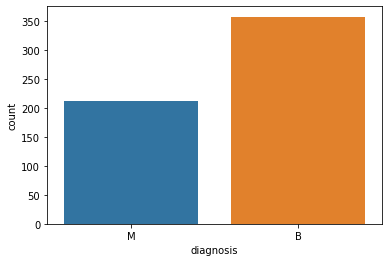

In [2]:
#data = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
path= "../input/breast-cancer-wisconsin-data/data.csv"

data=pd.read_csv(path)

data.head()

sns.countplot(data['diagnosis'],label="Count")
plt.show()




In [3]:

data=data.drop(['Unnamed: 32', 'id'], axis = 1)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  FutureWarning,


(568, 31)
0
1.000000       float64
17.990000      float64
10.380000      float64
122.800000     float64
1001.000000    float64
0.118400       float64
0.277600       float64
0.300100       float64
0.147100       float64
0.241900       float64
0.078710       float64
1.095000       float64
0.905300       float64
8.589000       float64
153.400000     float64
0.006399       float64
0.049040       float64
0.053730       float64
0.015870       float64
0.030030       float64
0.006193       float64
25.380000      float64
17.330000      float64
184.600000     float64
2019.000000    float64
0.162200       float64
0.665600       float64
0.711900       float64
0.265400       float64
0.460100       float64
0.118900       float64
dtype: object
0   1.0000     17.9900    10.3800    122.8000   1001.0000  0.1184     0.2776     0.3001     \
0         1.0   0.643144   0.272574   0.615783   0.501591   0.289880   0.181768   0.203608   
1         1.0   0.601496   0.390260   0.595743   0.449417   0.514309   0.

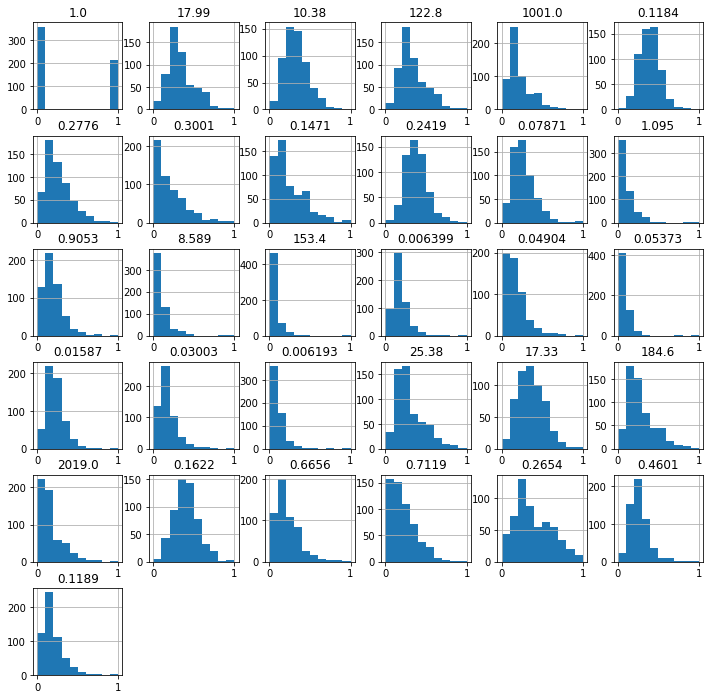

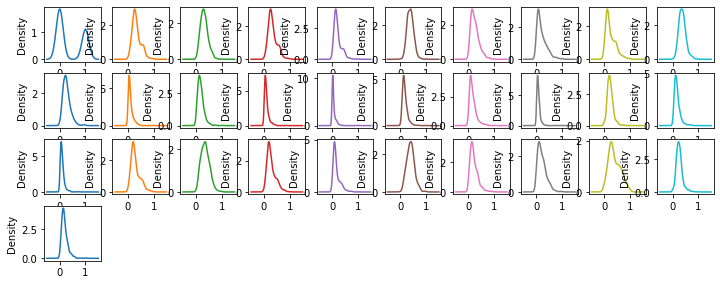

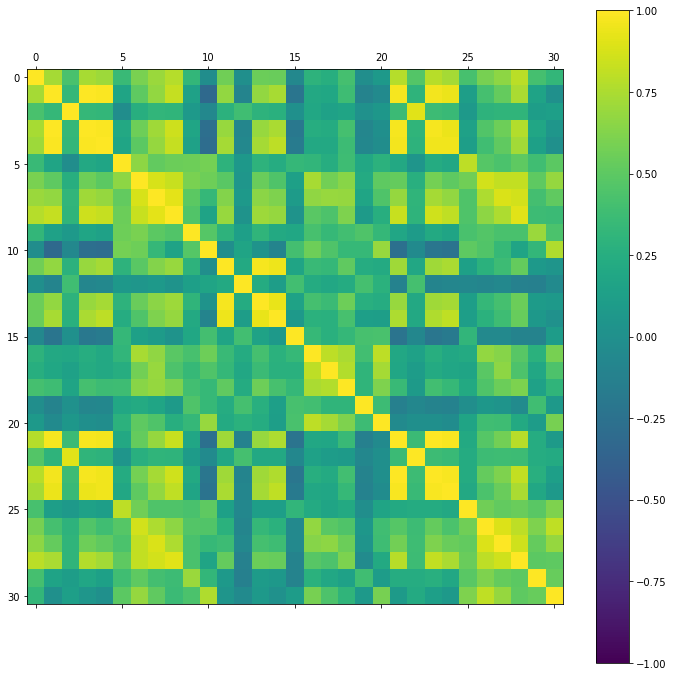

In [4]:


df=data
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header
#
# =============================================================================
cols = df.columns
df = pd.DataFrame(df)
df

#df = (df - df.mean())/df.std()
#df= np.float64((df - df.mean())/df.std())
df = (df - np.min(df))/(np.max(df) - np.min(df)).values

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized

df = pd.DataFrame(df_normalized)

# Summarize Data
Describe=df.describe()

corr=df.corr()
# Descriptive statistics
# shape
print(df.shape)
# types
set_option('display.max_rows', 500)
print(df.dtypes)
# head
set_option('display.width', 100)
print(df.head(20))
# descriptions, change precision to 3 places
set_option('precision', 3)
print(df.describe())
# class distribution
# =============================================================================
#print(df.groupby(30).size())
# 
# 
# # Data visualizations
# 
# # histograms
df.hist(figsize = (12,12))
pyplot.show()

# # density
df.plot(kind='density', subplots=True, layout=(10,10), sharex=False, legend=False, figsize = (12,12))
pyplot.show()
# 
# scatter plot matrix
#scatter_matrix(df, figsize = (12,12))
#pyplot.show()
# 
# # correlation matrix
fig = pyplot.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()
# =============================================================================

# Prepare Data

# Split-out validation dataset
array = np.array(df.values, np.float64)
NoF=array.shape[1]
#X=array[:,0:NoF-1]
X=array[:,1:NoF]
Y=array[:,0]
#
validation_size = 0.33
seed = np.random.RandomState(0)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)


#SVD
U, s, VT = svd(X_train.transpose().dot(X_train))
X_train = X_train.dot(U)
X_validation=(X_validation.dot(U))

# Test options and evaluation metric
num_folds = 10
seed = random_state = np.random.RandomState(0)
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []



In [5]:
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.955263 (0.026447)
LDA: 0.952632 (0.032868)
KNN: 0.965789 (0.012059)
CART: 0.902632 (0.033391)
NB: 0.855263 (0.062552)
SVM: 0.963158 (0.033701)


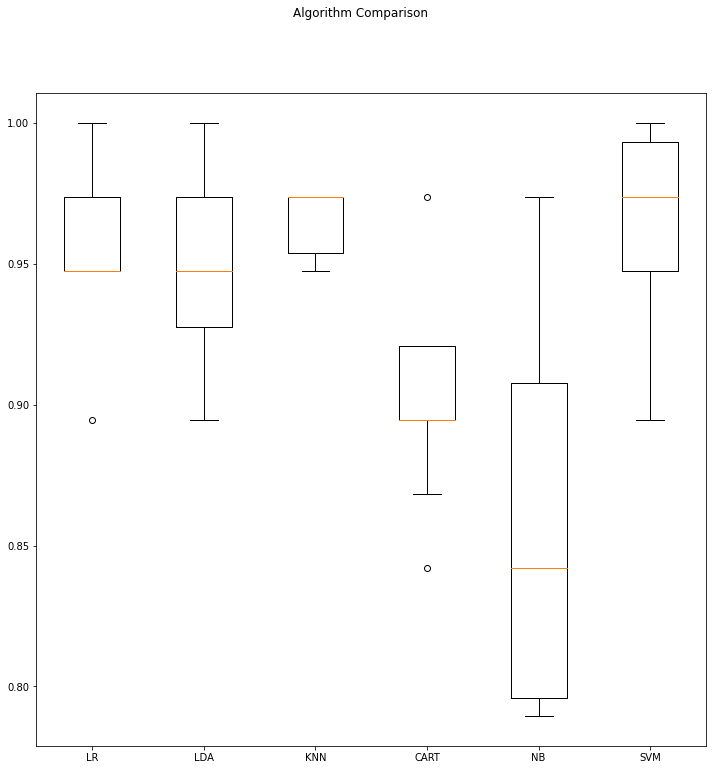

In [6]:
# Compare Algorithms
fig = pyplot.figure(figsize = (12,12))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



In [7]:

# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


ScaledLR: 0.947368 (0.035306)
ScaledLDA: 0.944737 (0.044737)
ScaledKNN: 0.842105 (0.057655)
ScaledCART: 0.886842 (0.055263)
ScaledNB: 0.860526 (0.044113)
ScaledSVM: 0.928947 (0.040853)


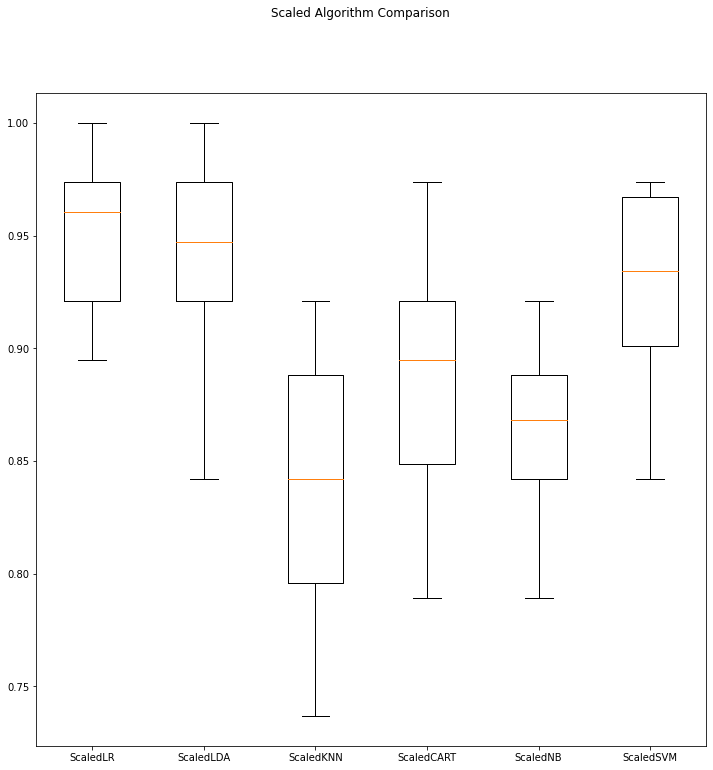

In [8]:
# Compare Algorithms
fig = pyplot.figure(figsize = (12,12))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [9]:

# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Best: 0.847368 using {'n_neighbors': 3}
0.823684 (0.067658) with: {'n_neighbors': 1}
0.847368 (0.056195) with: {'n_neighbors': 3}
0.842105 (0.045580) with: {'n_neighbors': 5}
0.826316 (0.054188) with: {'n_neighbors': 7}
0.831579 (0.051568) with: {'n_neighbors': 9}
0.807895 (0.057715) with: {'n_neighbors': 11}
0.786842 (0.058193) with: {'n_neighbors': 13}
0.781579 (0.073543) with: {'n_neighbors': 15}
0.768421 (0.076993) with: {'n_neighbors': 17}
0.763158 (0.078065) with: {'n_neighbors': 19}
0.760526 (0.085232) with: {'n_neighbors': 21}


In [10]:


# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Best: 0.952632 using {'C': 0.3, 'kernel': 'linear'}
0.939474 (0.028947) with: {'C': 0.1, 'kernel': 'linear'}
0.628947 (0.095935) with: {'C': 0.1, 'kernel': 'poly'}
0.844737 (0.053220) with: {'C': 0.1, 'kernel': 'rbf'}
0.921053 (0.031137) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.952632 (0.022942) with: {'C': 0.3, 'kernel': 'linear'}
0.681579 (0.092256) with: {'C': 0.3, 'kernel': 'poly'}
0.897368 (0.047733) with: {'C': 0.3, 'kernel': 'rbf'}
0.936842 (0.033701) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.952632 (0.028343) with: {'C': 0.5, 'kernel': 'linear'}
0.700000 (0.100690) with: {'C': 0.5, 'kernel': 'poly'}
0.921053 (0.035306) with: {'C': 0.5, 'kernel': 'rbf'}
0.936842 (0.029304) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.950000 (0.029889) with: {'C': 0.7, 'kernel': 'linear'}
0.721053 (0.102733) with: {'C': 0.7, 'kernel': 'poly'}
0.931579 (0.024119) with: {'C': 0.7, 'kernel': 'rbf'}
0.936842 (0.029304) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.944737 (0.034211) with: {'C': 0.9, 'kernel': 'line

In [11]:

# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.936842 (0.026837)
GBM: 0.947368 (0.026316)
RF: 0.942105 (0.025784)
ET: 0.947368 (0.037216)


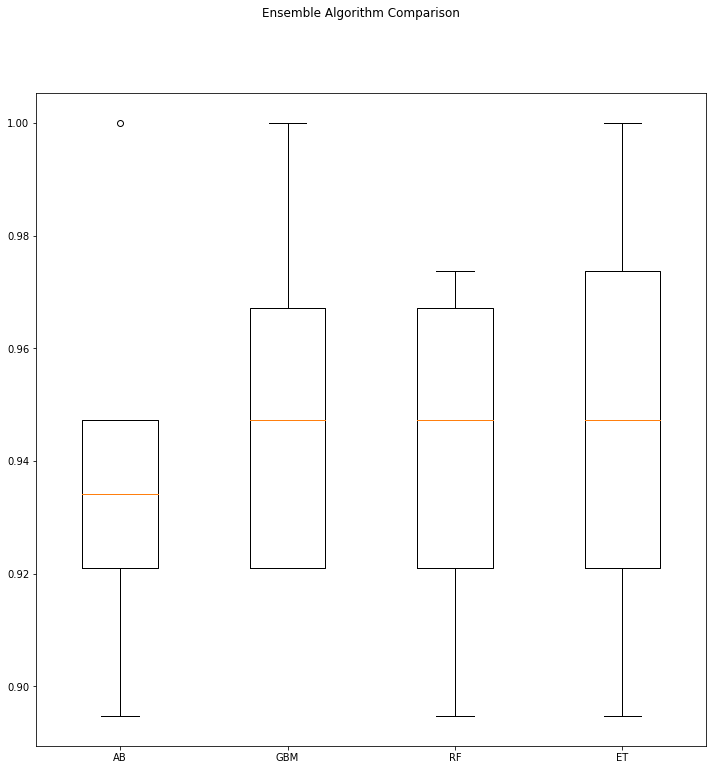

In [12]:
# Compare Algorithms
fig = pyplot.figure(figsize = (12,12))
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [13]:

# Finalize Model

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)


SVC(C=1.5)

In [14]:

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))



0.9414893617021277
[[120   3]
 [  8  57]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       123
         1.0       0.95      0.88      0.91        65

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.93       188
weighted avg       0.94      0.94      0.94       188

